# Colors
http://matplotlib.org/users/color_index.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Specifying Colors
http://matplotlib.org/users/colors.html

In almost all places in matplotlib where a color can be specified by the user it can be provided as:

- an RGB or RGBA tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3))
- a hex RGB or RGBA string (e.g., '#0F0F0F' or '#0F0F0F0F')
- a string representation of a float value in [0, 1] inclusive for gray level (e.g., '0.5')
- one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
- a X11/CSS4 color name
- a name from the xkcd color survey prefixed with 'xkcd:' (e.g., 'xkcd:sky blue')
- one of {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'}
- one of {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} which are the Tableau Colors from the ‘T10’ categorical palette (which is the default color cycle).

All string specifications of color are case-insensitive.

### 'CN' color selection

Color can be specified by a string matching the regex C[0-9]. This can be passed any place that a color is currently accepted and can be used as a ‘single character color’ in format-string to ***matplotlib.Axes.plot***.

The single digit is the index into the default property cycle (matplotlib.rcParams['axes.prop_cycle']). If the property cycle does not include 'color' then black is returned. The color is evaluated when the artist is created. For example,

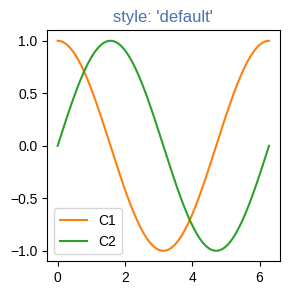

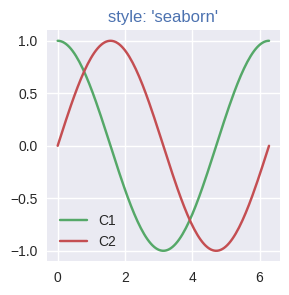

In [3]:
import matplotlib as mpl
th = np.linspace(0, 2*np.pi, 128)

def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()

demo('default')
demo('seaborn')

## xkcd v X11/CSS4

The xkcd colors are derived from a user survey conducted by the webcomic xkcd. Details of the survey are available on the xkcd blog.

Out of 148 colors in the CSS color list, there are 95 name collisions between the X11/CSS4 names and the xkcd names, all but 3 of which have different hex values. For example 'blue' maps to '#0000FF' where as 'xkcd:blue' maps to '#0343DF'. Due to these name collisions all of the xkcd colors have 'xkcd:' prefixed. As noted in the blog post, while it might be interesting to re-define the X11/CSS4 names based on such a survey, we do not do so unilaterally.

The name collisions are shown in the table below; the color names where the hex values agree are shown in bold.

(0.0, 3.0, 0.0, 50.0)

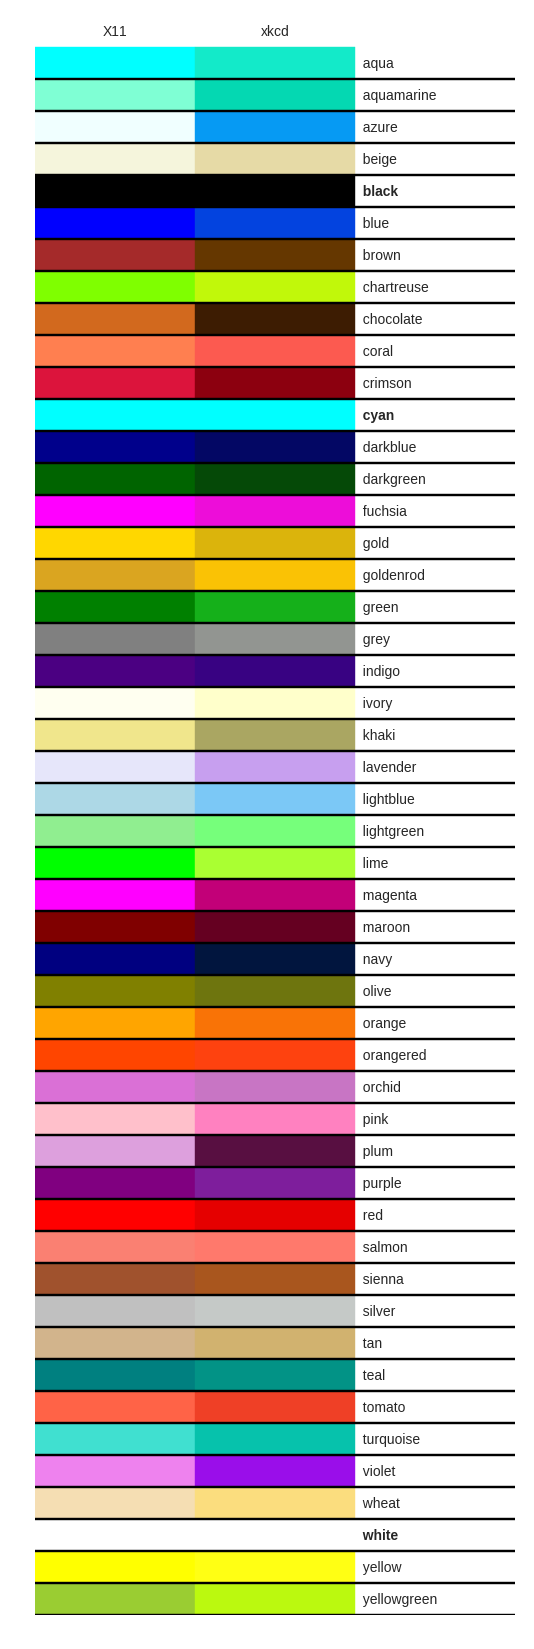

In [4]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[4.8, 16])
ax = fig.add_axes([0, 0, 1, 1])

for j, n in enumerate(sorted(overlap, reverse=True)):
    weight = None
    cn = mcd.CSS4_COLORS[n]
    xkcd = mcd.XKCD_COLORS["xkcd:" + n].upper()
    if cn == xkcd:
        weight = 'bold'

    r1 = mpatch.Rectangle((0, j), 1, 1, color=cn)
    r2 = mpatch.Rectangle((1, j), 1, 1, color=xkcd)
    txt = ax.text(2, j+.5, '  ' + n, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.add_patch(r2)
    ax.axhline(j, color='k')

ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
ax.text(1.5, j + 1.5, 'xkcd', ha='center', va='center')
ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

# Choosing Colormaps
http://matplotlib.org/users/colormaps.html

## Overview

The idea behind choosing a good colormap is to find a good representation in 3D colorspace for your data set. The best colormap for any given data set depends on many things including:

- Whether representing form or metric data ([Ware])
- Your knowledge of the data set (e.g., is there a critical value from which the other values deviate?)
- If there is an intuitive color scheme for the parameter you are plotting
- If there is a standard in the field the audience may be expecting

For many applications, a perceptually uniform colormap is the best choice — one in which equal steps in data are perceived as equal steps in the color space. Researchers have found that ***the human brain perceives changes in the lightness parameter as changes in the data much better than, for example, changes in hue***. Therefore, ***colormaps which have monotonically increasing lightness through the colormap will be better interpreted by the viewer***. A wonderful example of perceptually uniform colormaps is [colorcet](https://github.com/bokeh/colorcet).

Color can be represented in 3D space in various ways. One way to represent color is using CIELAB. In ***CIELAB***, color space is represented by lightness, ; red-green, ; and yellow-blue, . The lightness parameter  can then be used to learn more about how the matplotlib colormaps will be perceived by viewers.

An excellent starting resource for learning about human perception of colormaps is from [IBM].

## Classes of colormaps

Colormaps are often split into several categories based on their function (see, e.g., [Moreland]):

- Sequential: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.
- Diverging: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.
- Qualitative: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.

## Lightness of matplotlib colormaps

Here we examine the lightness values of the matplotlib colormaps. Note that some documentation on the colormaps is available ([list-colormaps](http://matplotlib.org/users/colormaps.html#list-colormaps)).

### Sequential
For the Sequential plots, the lightness value increases monotonically through the colormaps. This is good. Some of the  values in the colormaps span from 0 to 100 (binary and the other grayscale), and others start around . Those that have a smaller range of  will accordingly have a smaller perceptual range. Note also that the function varies amongst the colormaps: some are approximately linear in  and others are more curved.

### Sequential2
Many of the  values from the Sequential2 plots are monotonically increasing, but some (autumn, cool, spring, and winter) plateau or even go both up and down in  space. Others (afmhot, copper, gist_heat, and hot) have kinks in the  functions. Data that is being represented in a region of the colormap that is at a plateau or kink will lead to a perception of banding of the data in those values in the colormap (see [mycarta-banding] for an excellent example of this).

### Diverging
For the Diverging maps, we want to have monotonically increasing values up to a maximum, which should be close to , followed by monotonically decreasing  values. We are looking for approximately equal minimum  values at opposite ends of the colormap. By these measures, BrBG and RdBu are good options. coolwarm is a good option, but it doesn’t span a wide range of  values (see grayscale section below).

### Qualitative
Qualitative colormaps are not aimed at being perceptual maps, but looking at the lightness parameter can verify that for us. The  values move all over the place throughout the colormap, and are clearly not monotonically increasing. These would not be good options for use as perceptual colormaps.

### Miscellaneous
Some of the miscellaneous colormaps have particular uses for which they have been created. For example, gist_earth, ocean, and terrain all seem to be created for plotting topography (green/brown) and water depths (blue) together. We would expect to see a divergence in these colormaps, then, but multiple kinks may not be ideal, such as in gist_earth and terrain. CMRmap was created to convert well to grayscale, though it does appear to have some small kinks in . cubehelix was created to vary smoothly in both lightness and hue, but appears to have a small hump in the green hue area.

The often-used jet colormap is included in this set of colormaps. We can see that the  values vary widely throughout the colormap, making it a poor choice for representing data for viewers to see perceptually. See an extension on this idea at [mycarta-jet].

In [11]:
'''
For each colormap, plot the lightness parameter L* from CIELAB colorspace
along the y axis vs index through the colormap. Colormaps are examined in
categories as in the original matplotlib gallery of colormaps.
'''

from colormaps import cmaps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from colorspacious import cspace_converter

mpl.rcParams.update({'font.size': 12})

# indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps:

    # Do subplots so that colormaps have enough space. 5 per subplot?
    dsub = 5 # number of colormaps per subplot
    if cmap_category == 'Diverging': # because has 12 colormaps
        dsub = 6
    elif cmap_category == 'Sequential (2)':
        dsub = 6
    elif cmap_category == 'Sequential':
        dsub = 7
    nsubplots = int(np.ceil(len(cmap_list)/float(dsub)))

    fig = plt.figure(figsize=(7,2.6*nsubplots))

    for i, subplot in enumerate(range(nsubplots)):

        locs = [] # locations for text labels

        ax = fig.add_subplot(nsubplots, 1, i+1)

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get rgb values for colormap
            rgb = cm.get_cmap(cmap)(x)[np.newaxis,:,:3]

            # Get colormap in CAM02-UCS colorspace. We want the lightness.
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values
            # Do separately for each category so each plot can be pretty
            # to make scatter markers change color along plot:
            # http://stackoverflow.com/questions/8202605/matplotlib-scatterplot-colour-as-a-function-of-a-third-variable
            if cmap_category=='Perceptually Uniform Sequential':
                dc = 1.15 # spacing between colormaps
                ax.scatter(x+j*dc, lab[0,:,0], c=x, cmap=cmap,
                           s=300, linewidths=0.)
                if i==2:
                    ax.axis([-0.1,4.1,0,100])
                else:
                    ax.axis([-0.1,4.7,0,100])
                locs.append(x[-1]+j*dc) # store locations for colormap labels

            elif cmap_category=='Sequential':
                dc = 0.6 # spacing between colormaps
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                ax.scatter(x+j*dc, lab[0,::-1,0], c=x[::-1], cmap=cmap,
                           s=300, linewidths=0.)
                if i==2:
                    ax.axis([-0.1,4.1,0,100])
                else:
                    ax.axis([-0.1,4.7,0,100])
                locs.append(x[-1]+j*dc) # store locations for colormap labels

            elif cmap_category=='Sequential (2)':
                dc = 1.15
                ax.scatter(x+j*dc, lab[0,:,0], c=x, cmap=cmap,
                           s=300, linewidths=0.)
                ax.axis([-0.1,7.0,0,100])
                # store locations for colormap labels
                locs.append(x[-1]+j*dc)

            elif cmap_category=='Diverging':
                dc = 1.2
                ax.scatter(x+j*dc, lab[0,:,0], c=x, cmap=cmap,
                           s=300, linewidths=0.)
                ax.axis([-0.1,7.1,0,100])
                # store locations for colormap labels
                locs.append(x[int(x.size/2.)]+j*dc)
            elif cmap_category=='Qualitative':
                dc = 1.3
                ax.scatter(x+j*dc, lab[0,:,0], c=x, cmap=cmap,
                           s=300, linewidths=0.)
                ax.axis([-0.1,6.3,0,100])
                # store locations for colormap labels
                locs.append(x[int(x.size/2.)]+j*dc)

            elif cmap_category=='Miscellaneous':
                dc = 1.25
                ax.scatter(x+j*dc, lab[0,:,0], c=x, cmap=cmap,
                           s=300, linewidths=0.)
                ax.axis([-0.1,6.1,0,100])
                # store locations for colormap labels
                locs.append(x[int(x.size/2.)]+j*dc)

            # Set up labels for colormaps
            ax.xaxis.set_ticks_position('top')
            ticker = mpl.ticker.FixedLocator(locs)
            ax.xaxis.set_major_locator(ticker)
            formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
            ax.xaxis.set_major_formatter(formatter)
            labels = ax.get_xticklabels()
            for label in labels:
                label.set_rotation(60)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)
    fig.text(0.0, 0.55, 'Lightness $L^*$', fontsize=12,
             transform=fig.transFigure, rotation=90)

    fig.tight_layout(h_pad=0.05, pad=1.5)
    plt.show()

ModuleNotFoundError: No module named 'colormaps'

## Grayscale conversion

It is important to pay attention to conversion to grayscale for color plots, since they may be printed on black and white printers. If not carefully considered, your readers may end up with indecipherable plots because the grayscale changes unpredictably through the colormap.

Conversion to grayscale is done in many different ways [bw]. Some of the better ones use a linear combination of the rgb values of a pixel, but weighted according to how we perceive color intensity. A nonlinear method of conversion to grayscale is to use the  values of the pixels. In general, similar principles apply for this question as they do for presenting one’s information perceptually; that is, if a colormap is chosen that is monotonically increasing in  values, it will print in a reasonable manner to grayscale.

With this in mind, we see that the Sequential colormaps have reasonable representations in grayscale. Some of the Sequential2 colormaps have decent enough grayscale representations, though some (autumn, spring, summer, winter) have very little grayscale change. If a colormap like this was used in a plot and then the plot was printed to grayscale, a lot of the information may map to the same gray values. The Diverging colormaps mostly vary from darker gray on the outer edges to white in the middle. Some (PuOr and seismic) have noticably darker gray on one side than the other and therefore are not very symmetric. coolwarm has little range of gray scale and would print to a more uniform plot, losing a lot of detail. Note that overlaid, labeled contours could help differentiate between one side of the colormap vs. the other since color cannot be used once a plot is printed to grayscale. Many of the Qualitative and Miscellaneous colormaps, such as Accent, hsv, and jet, change from darker to lighter and back to darker gray throughout the colormap. This would make it impossible for a viewer to interpret the information in a plot once it is printed in grayscale.

In [10]:
'''
Show what matplotlib colormaps look like in grayscale.
Uses lightness L* as a proxy for grayscale value.
'''

from colormaps import cmaps

#from skimage import color
# we are using a local copy of colorconv from scikit-image to reduce dependencies.
# You should probably use the one from scikit-image in most cases.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from colorspacious import cspace_converter

mpl.rcParams.update({'font.size': 14})


# indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    nrows = len(cmap_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axes, cmap_list):

        # Get rgb values for colormap
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis,:,:3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0,:,0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax[0].set_axis_off()
        ax[1].set_axis_off()
    plt.show()


for cmap_category, cmap_list in cmaps:

    plot_color_gradients(cmap_category, cmap_list)

ModuleNotFoundError: No module named 'colorspacious'

### Color vision deficiencies
There is a lot of information available about color blindness (e.g., [colorblindness]). Additionally, there are tools available to convert images to how they look for different types of color vision deficiencies (e.g., [vischeck]).

The most common form of color vision deficiency involves differentiating between red and green. Thus, avoiding colormaps with both red and green will avoid many problems in general.

In [12]:
'''
Show what matplotlib colormaps look like in grayscale.
Uses lightness L* as a proxy for grayscale value.
'''

from colormaps import cmaps

#from skimage import color
# we are using a local copy of colorconv from scikit-image to reduce dependencies.
# You should probably use the one from scikit-image in most cases.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from colorspacious import cspace_converter

mpl.rcParams.update({'font.size': 14})


# indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    nrows = len(cmap_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axes, cmap_list):

        # Get rgb values for colormap
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis,:,:3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0,:,0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax[0].set_axis_off()
        ax[1].set_axis_off()
    plt.show()


for cmap_category, cmap_list in cmaps:

    plot_color_gradients(cmap_category, cmap_list)

ModuleNotFoundError: No module named 'colormaps'

### Color vision deficiencies
There is a lot of information available about color blindness (e.g., [colorblindness]). Additionally, there are tools available to convert images to how they look for different types of color vision deficiencies (e.g., [vischeck]).

The most common form of color vision deficiency involves differentiating between red and green. Thus, avoiding colormaps with both red and green will avoid many problems in general.

# Colormap Normalization
http://matplotlib.org/users/colormapnorms.html

lt linearly map the colors in the colormap from data values vmin to vmax. For example:

> pcm = ax.pcolormesh(x, y, Z, vmin=-1., vmax=1., cmap='RdBu_r')

will map the data in Z linearly from -1 to +1, so Z=0 will give a color at the center of the colormap RdBu_r (white in this case).

Matplotlib does this mapping in two steps, with a normalization from [0,1] occurring first, and then mapping onto the indices in the colormap. Normalizations are classes defined in the ***matplotlib.colors()*** module. The default, linear normalization is ***matplotlib.colors.Normalize()***.

Artists that map data to color pass the arguments ***vmin*** and ***vmax*** to construct a ***matplotlib.colors.Normalize()*** instance, then call it:

In [13]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)
norm

In [14]:
norm(0.)

0.5

However, there are sometimes cases where it is useful to map data to colormaps in a non-linear fashion.

## Logarithmic

One of the most common transformations is to plot data by taking its logarithm (to the base-10). This transformation is useful to display changes across disparate scales. Using ***colors.LogNorm()*** normalizes the data via $\log_{10}$. In the example below, there are two bumps, one much smaller than the other. Using ***colors.LogNorm()***, the shape and location of each bump can clearly be seen:

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


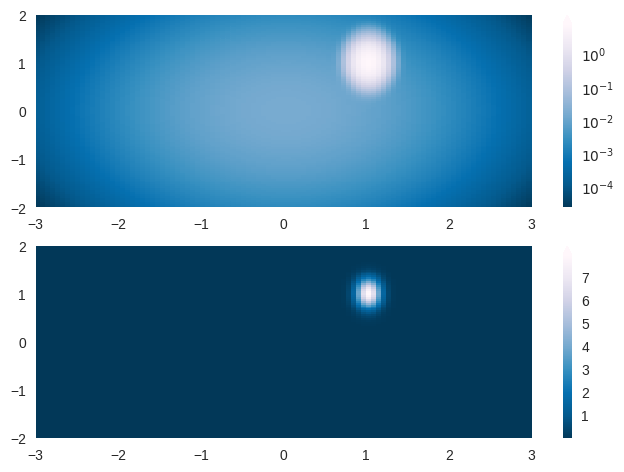

In [16]:
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z1,
                   norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
                   cmap='PuBu_r')

fig.colorbar(pcm, ax=ax[0], extend='max')


pcm = ax[1].pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')

fig.show()

## Symmetric logarithmic
Similarly, it sometimes happens that there is data that is positive and negative, but we would still like a logarithmic scaling applied to both. In this case, the negative numbers are also scaled logarithmically, and mapped to smaller numbers; e.g., if vmin=-vmax, then they the negative numbers are mapped from 0 to 0.5 and the positive from 0.5 to 1.

Since the logarithm of values close to zero tends toward infinity, a small range around zero needs to be mapped linearly. The parameter ***linthresh*** allows the user to specify the size of this range (-linthresh, linthresh). The size of this range in the colormap is set by ***linscale***. When linscale == 1.0 (the default), the space used for the positive and negative halves of the linear range will be equal to one decade in the logarithmic range.

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


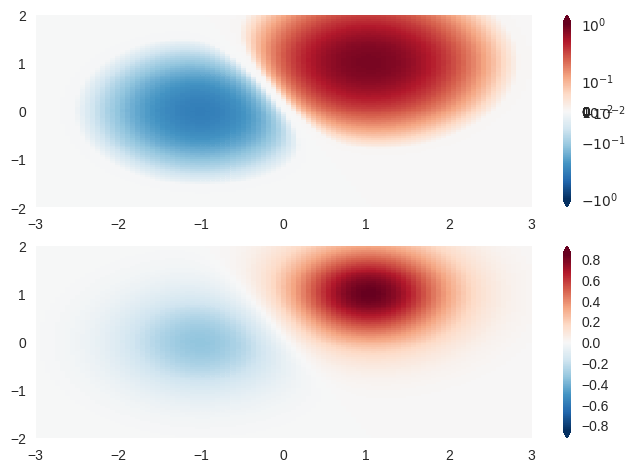

In [17]:
"""
Demonstration of using norm to map colormaps onto data in non-linear ways.
"""
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

"""
SymLogNorm: two humps, one negative and one positive, The positive
with 5-times the amplitude. Linearly, you cannot see detail in the
negative hump.  Here we logarithmically scale the positive and
negative data separately.

Note that colorbar labels do not come out looking very good.
"""
N=100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')

fig.show()

## Power-law
Sometimes it is useful to remap the colors onto a power-law relationship (i.e. $y=x^\gamma$, where $\gamma$ is the power). For this we use the ***colors.PowerNorm()***. It takes as an argument gamma (gamma == 1.0 will just yield the default linear normalization):

Note:  
There should probably be a good reason for plotting the data using this type of transformation. Technical viewers are used to linear and logarithmic axes and data transformations. Power laws are less common, and viewers should explicitly be made aware that they have been used.

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


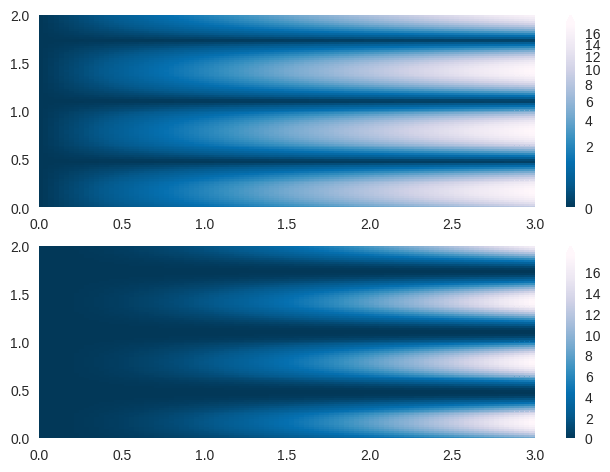

In [18]:
"""
Demonstration of using norm to map colormaps onto data in non-linear ways.
"""

import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

'''
PowerNorm: Here a power-law trend in X partially obscures a rectified
sine wave in Y. We can remove the power law using a PowerNorm.
'''
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**(2.)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=1./2.),
                       cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')

fig.show()

## Discrete bounds
Another normaization that comes with matplolib is ***colors.BoundaryNorm()***. In addition to vmin and vmax, this takes as arguments boundaries between which data is to be mapped. The colors are then linearly distributed between these “bounds”. For instance:

Note unlike the other norms, this norm returns values from 0 to ncolors-1.

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


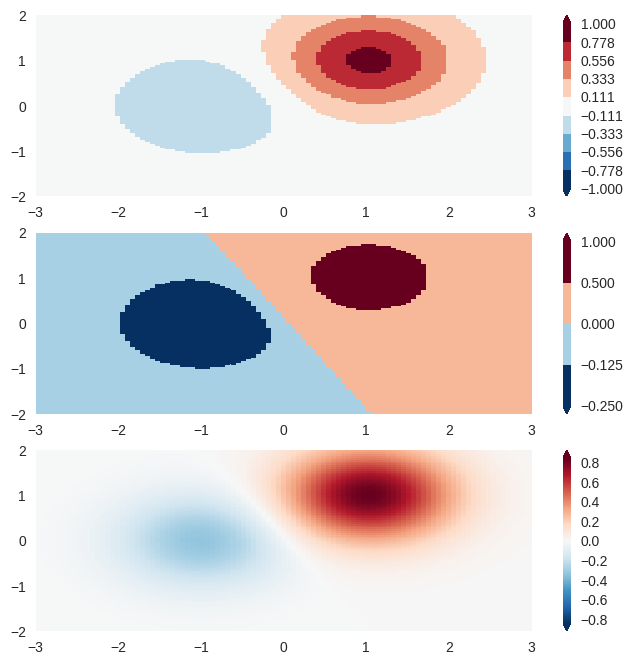

In [19]:
"""
Demonstration of using norm to map colormaps onto data in non-linear ways.
"""

import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

'''
BoundaryNorm: For this one you provide the boundaries for your colors,
and the Norm puts the first color in between the first pair, the
second color between the second pair, etc.
'''

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()

# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')

fig.show()

## Custom normalization: Two linear ranges
It is possible to define your own normalization. In the following example, we modify ***colors.SymLogNorm()*** to use different linear maps for the negative data values and the positive. (Note that this example is simple, and does not validate inputs or account for complex cases such as masked data)

Note:  
This may appear soon as ***colors.OffsetNorm()***.
As above, non-symmetric mapping of data to color is non-standard practice for quantitative data, and should only be used advisedly. A practical example is having an ocean/land colormap where the land and ocean data span different ranges.

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


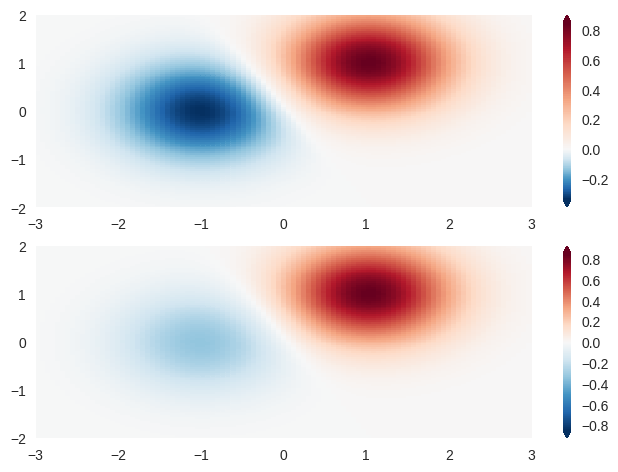

In [20]:
"""
Demonstration of using norm to map colormaps onto data in non-linear ways.
"""

import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
'''
Custom Norm: An example with a customized normalization.  This one
uses the example above, and normalizes the negative data differently
from the positive.
'''
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####
fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=MidpointNormalize(midpoint=0.),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()